In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from acquire import get_store_sales_data, get_open_power_systems_data
from prepare import prepare_data, prepare_ops_data

# Time Series Explore Exercises

## Store Data

In [2]:
store_sales = prepare_data(get_store_sales_data())
store_sales.shape

Reading from .csv file.
Reading from .csv file.
Reading from .csv file.


(913000, 16)

In [3]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  object 
 14  weekday        913000 non-null  object 
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 118.4+ MB

### Splitting the Data

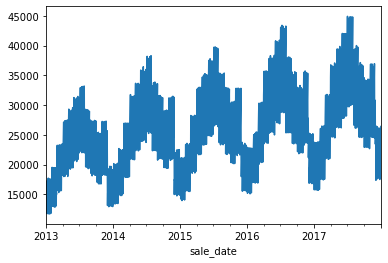

In [4]:
# Let's see the overall sale totals over time
store_sales.groupby(store_sales.index).sale_amount.sum().plot();

It looks like the data is periodic on a yearly basis. We will make the split at 2017.

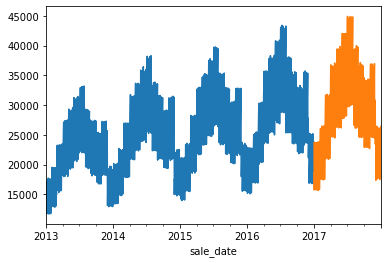

In [5]:
# We'll make the train set everything up to and including 2016,
# the test set will be 2017
train = store_sales.loc[ : '2016']
test = store_sales.loc['2017']

train.groupby(train.index).sale_amount.sum().plot()
test.groupby(test.index).sale_amount.sum().plot();

### Blow off the time series

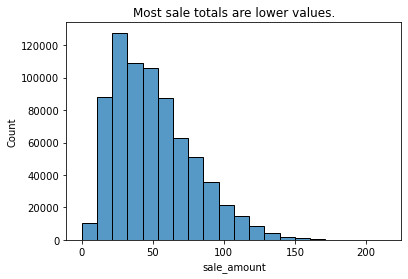

In [6]:
# Let's see the distribution of sale_amount
sns.histplot(train.sale_amount, bins = 20)
plt.title('Most sale totals are lower values.');

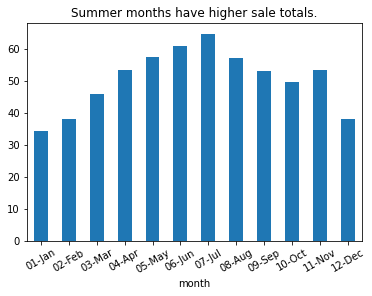

In [7]:
# Let's see average sale_amount for each month
ax = train.groupby(train.month).sale_amount.mean().plot.bar()
ax.tick_params('x', rotation = 30)
plt.title('Summer months have higher sale totals.');

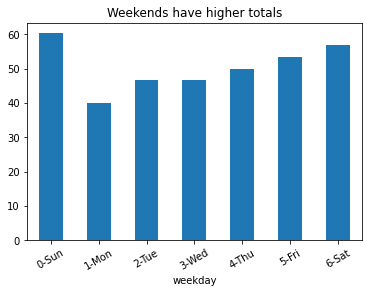

In [8]:
# Let's see the average sale_amount by weekday
ax = train.groupby(train.weekday).sale_amount.mean().plot.bar()
ax.tick_params('x', rotation = 30)
plt.title('Weekends have higher totals');

### y over time

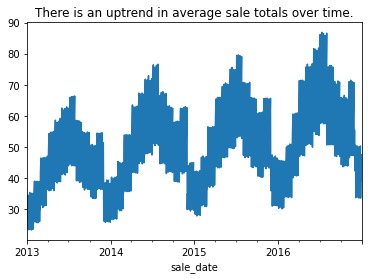

In [9]:
# Let's see the sale_amount over time
train.groupby(train.index).sale_amount.mean().plot()
plt.title('There is an uptrend in average sale totals over time.');

### y over various periods of time

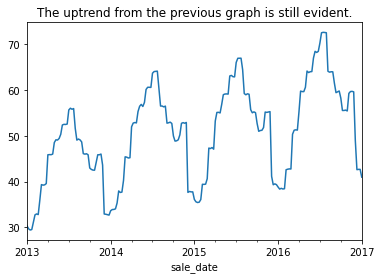

In [10]:
# Let's look at time intervals of 1 week
train.resample('1W').sale_amount.mean().plot()
plt.title('The uptrend from the previous graph is still evident.');

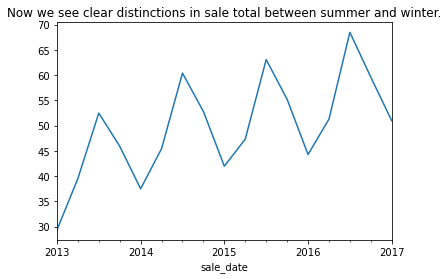

In [11]:
# Now let's try 3 month intervals
train.resample('3M').sale_amount.mean().plot()
plt.title('Now we see clear distinctions in sale total between summer and winter.');

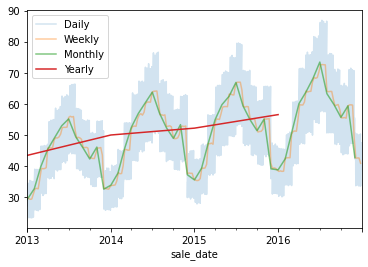

In [12]:
# Let's see various intervals in one chart.
train.groupby(train.index).sale_amount.mean().plot(alpha = 0.2, label = 'Daily')
train.resample('W').sale_amount.mean().plot(alpha = 0.4, label = 'Weekly')
train.resample('M').sale_amount.mean().plot(alpha = 0.6, label = 'Monthly')
train.resample('Y').sale_amount.mean().plot(label = 'Yearly')
plt.legend();

### Change in y over time

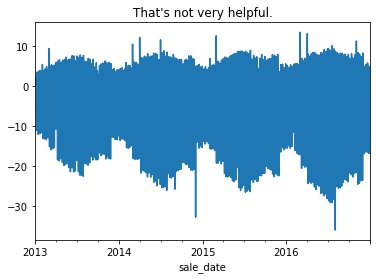

In [13]:
# Let's try plotting the difference in sale amount over time
train.groupby(train.index).sale_amount.mean().diff().plot()
plt.title("That's not very helpful.");

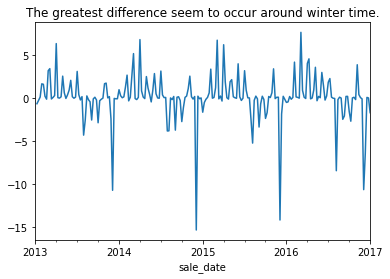

In [14]:
# Let's resample by week
train.resample('W').sale_amount.mean().diff().plot()
plt.title('The greatest difference seem to occur around winter time.');

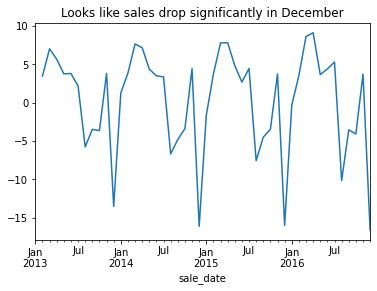

In [15]:
# Let's now resample by month
train.resample('M').sale_amount.mean().diff().plot()
plt.title('Looks like sales drop significantly in December');

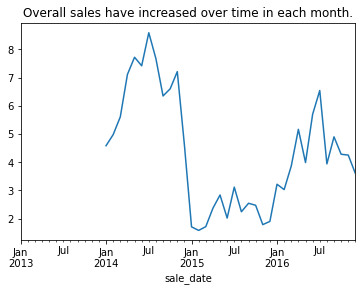

In [16]:
# Let's see the difference per month each year
train.resample('M').sale_amount.mean().diff(12).plot()
plt.title('Overall sales have increased over time in each month.');

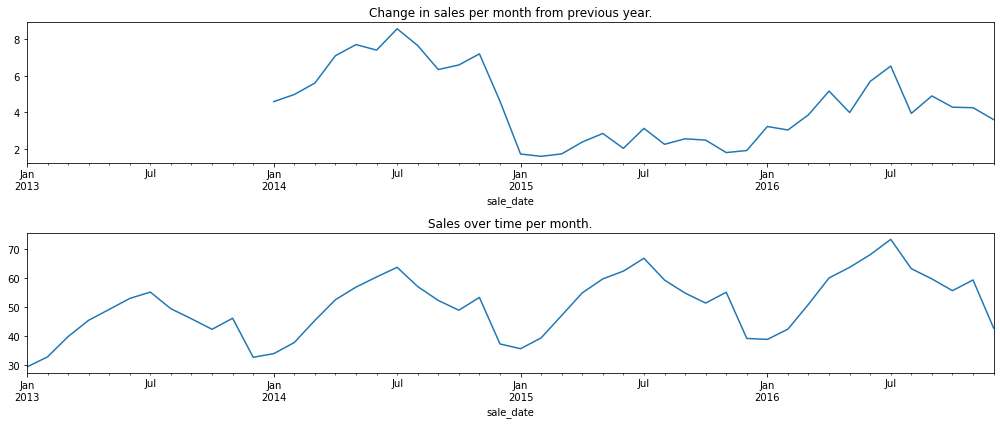

In [17]:
# Let's put the previous chart next to the monthly sales chart.
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 6))

train.resample('M').sale_amount.mean().diff(12).plot(ax = ax[0])
ax[0].set_title('Change in sales per month from previous year.')

train.resample('M').sale_amount.mean().plot(ax = ax[1])
ax[1].set_title('Sales over time per month.')

plt.tight_layout();

### Seasonal plot

/var/folders/45/z3vf0vrn1fz5mzs6sp418wym0000gn/T/ipykernel_2292/4195552884.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:,.0f}' for tick in ax.get_yticks()])


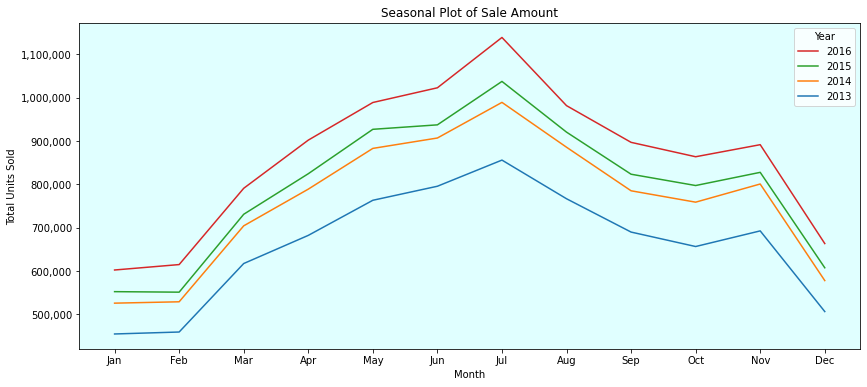

In [55]:
# Create seasonal plot.
ax = train.groupby([train.index.year, train.month]).sale_amount.sum().unstack(0).plot(figsize = (14, 6))
plt.title('Seasonal Plot of Sale Amount')

# Set y axis to not use scientific notation.
ax.ticklabel_format(style = 'plain', axis = 'y')

# Set background color
ax.set_facecolor('lightcyan')

# Set x tick labels to be the three letter abbreviation of each month.
plt.xticks(ticks = [x for x in range(12)], labels = [month[3 : ] for month in train.month.unique()])
plt.xlabel('Month')

# Set y tick labels to use commas.
ax.set_yticklabels([f'{tick:,.0f}' for tick in ax.get_yticks()])
plt.ylabel('Total Units Sold')

# Reorder labels in legend and add a title.
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    [handles[idx] for idx in range(3, -1, -1)],
    [labels[idx] for idx in range(3, -1, -1)],
    title = 'Year'
);

## OPS Data

In [60]:
ops = prepare_ops_data(get_open_power_systems_data())
ops.shape

(4383, 6)

In [61]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


### Splitting the Data

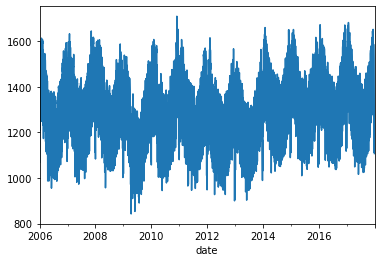

In [65]:
# Let's see the overall chart
ops.consumption.plot();

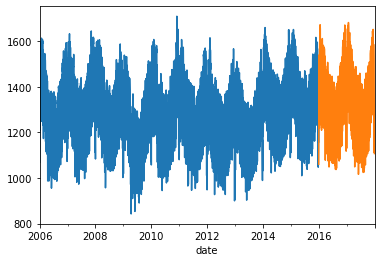

In [67]:
# The data looks periodic on a yearly basis. Let's split at 2016.
train = ops.loc[ : '2015']
test = ops.loc['2016' : ]

train.consumption.plot()
test.consumption.plot();

### Lag plot

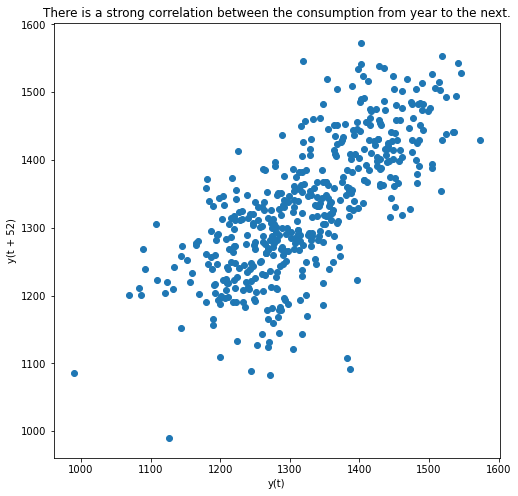

In [76]:
# Let's see the lag for each week one year out
plt.figure(figsize = (8, 8))
pd.plotting.lag_plot(train.resample('W').consumption.mean(), lag = 52)
plt.title('There is a strong correlation between the consumption from year to the next.');

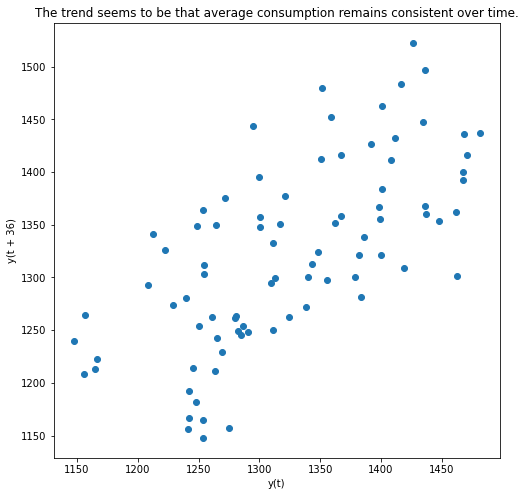

In [78]:
# Let's try monthly and 3 year lag
plt.figure(figsize = (8, 8))
pd.plotting.lag_plot(train.resample('M').consumption.mean(), lag = 36)
plt.title('The trend seems to be that average consumption remains consistent over time.');

### Autocorrelation plot

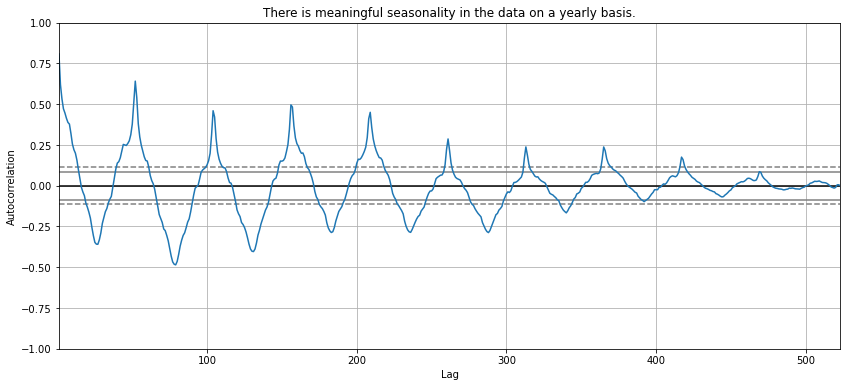

In [83]:
plt.figure(figsize = (14, 6))
pd.plotting.autocorrelation_plot(train.resample('W').consumption.mean())
plt.title('There is meaningful seasonality in the data on a yearly basis.');

### Seasonal decomposition

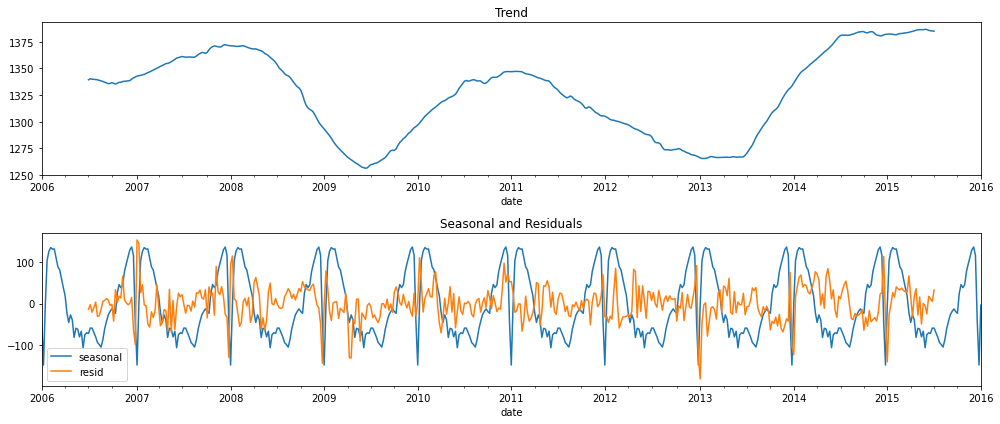

In [92]:
y = train.consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 6))
decomposition.iloc[ : , 1].plot(ax = ax[0])
ax[0].set_title('Trend')

decomposition.iloc[ : , 2 : ].plot(ax = ax[1])
ax[1].set_title('Seasonal and Residuals')

plt.tight_layout();

### Area plot

In [154]:
# First let's create some bins. We'll make bins for high consumption, medium consumption, and low consumption.
train_resampled = train.resample('D').mean()
train_resampled['consumption_bins'] = pd.qcut(
    train.consumption,
    3,
    labels = ['Low Energy Consumption', 'Mid Energy Consumption', 'High Energy Consumption']
)

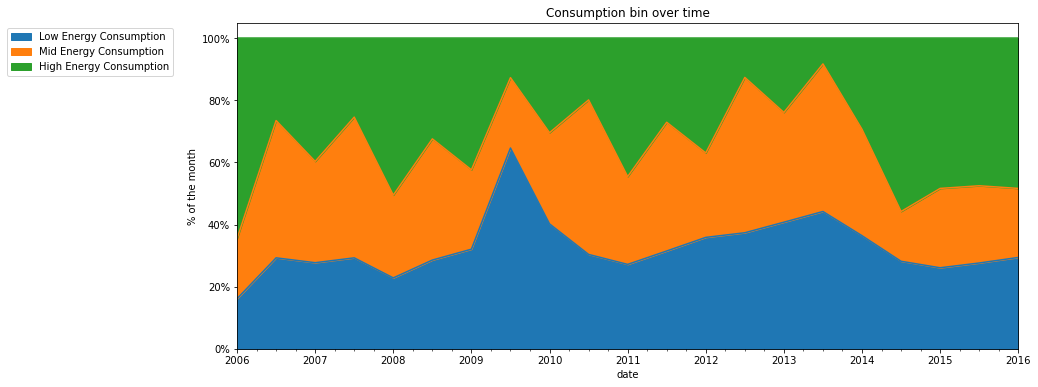

In [155]:
ax = (
    train_resampled.groupby('consumption_bins')
    .resample('6M')
    .size()
    .T
    .apply(lambda row: row / row.sum(), axis=1)
    .plot.area(title='Consumption bin over time', ylabel='% of the month', figsize = (14, 6))
)

ax.legend(loc="upper right", bbox_to_anchor=(-.075, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)